In [1]:
using Plots
using HDF5

In [2]:
#fidelity_data = "Kurt_POPSID_fidelity_dodeca_2022-Sep-21_at_20-26.h5"
fidelity_data = "Kurt_POPSID_fidelity_test_all_2022-Sep-23_at_09-29.h5"

directory = "C:/Users/Zakhar/Documents/GitHub/JPOP_SID/DATA/"

function get_keys(df)
    h5open(df, "r") do file
        return keys(file)
    end
end

function get_init_states(df, γ)
    h5open(df, "r") do file
        return keys(file[string(γ)])
    end
end

function get_fidelity_series(file_name, γ, init_state, method)
    h5open(file_name, "r") do file
        F_series = read(file[string(γ)][string(init_state)][string(method)])
        return(F_series)
    end
end

get_fidelity_series (generic function with 1 method)

In [3]:
function plot_fid_dynamics(directory, fidelity_data, γᵢ, method)
    
    initial_states = get_init_states(directory*fidelity_data, γᵢ)
    
    F = get_fidelity_series(directory*fidelity_data, γᵢ, initial_states[1], method)
    plt = plot(F, label = initial_states[1])

    for init_state in initial_states[2:end]

        F = get_fidelity_series(directory*fidelity_data, γᵢ, init_state, method)
        plt = plot!(F, label = init_state)

    end # of loop over dodecahedron initial states
    
    return plt
    
end   

plot_fid_dynamics (generic function with 1 method)

In [4]:
γ = get_keys(directory*fidelity_data)
#γ_value = [string(chop(γᵢ, head = 6, tail = 0)) for γᵢ in γ]

8-element Vector{String}:
 "gamma_0.079477"
 "gamma_0.25133"
 "gamma_0.79477"
 "gamma_2.5133"
 "gamma_25.133"
 "gamma_251.33"
 "gamma_7.9477"
 "gamma_79.477"

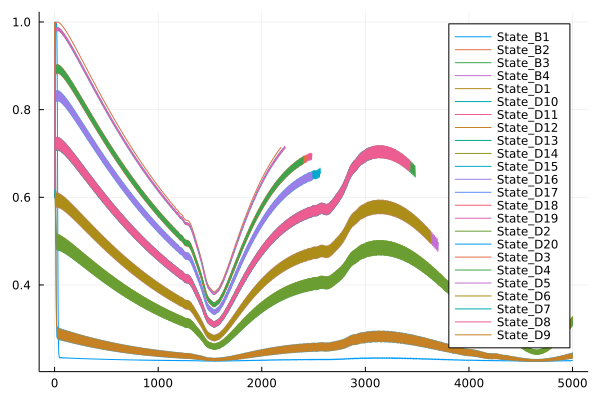

In [5]:
plot_fid_dynamics(directory, fidelity_data, "gamma_0.079477", "fidelity_kraus")

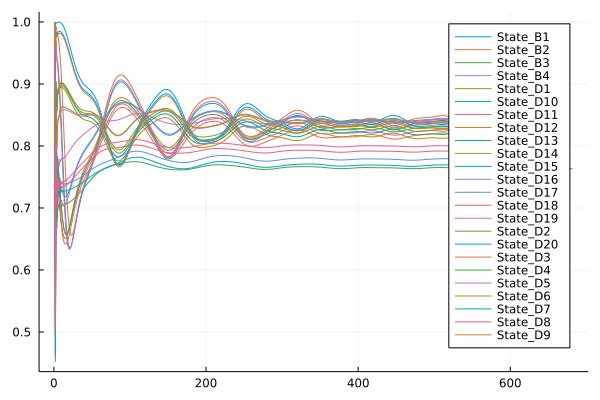

In [6]:
plot_fid_dynamics(directory, fidelity_data, "gamma_251.33", "fidelity_kraus")

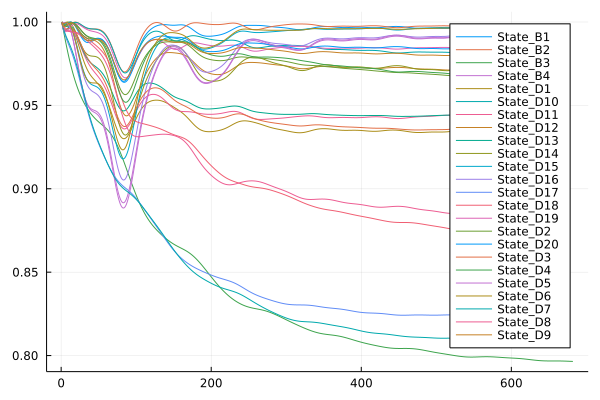

In [7]:
plot_fid_dynamics(directory, fidelity_data, "gamma_251.33", "fidelity_simp")

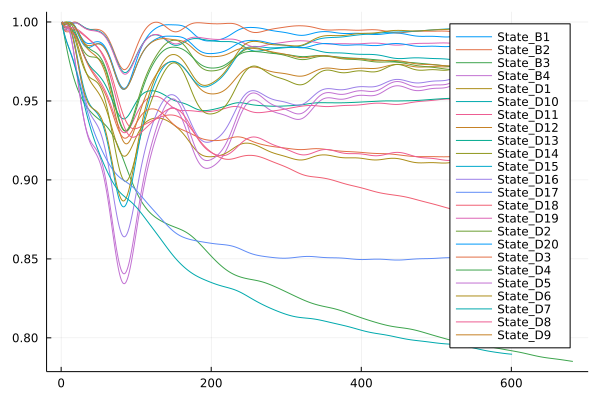

In [8]:
plot_fid_dynamics(directory, fidelity_data, "gamma_251.33", "fidelity_pade")